# Libraries

Libraries used for exploratory analysis.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
import pandas as pd

# Matplotlib 
%matplotlib inline

# Seabron
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style('whitegrid')

# Sympy
x = sp.symbols('x')

## Loading the data

The data used for this project was extracted from Kaggle.
An interesting topic was sought that had the potential to apply a Machine Learning algorithm.

url: https://www.kaggle.com/yasserh/breast-cancer-dataset

In [18]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- "se" : standard error for the mean of distances from center to points on the perimeter
- "worst": or largest mean value for mean of distances from center to points on the perimeter

## Cleaning the data

In the description of the dataset, in Kaggle, it was already announced that there was no missing data, however it was decided to use a simple but powerful method to verify this.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:>

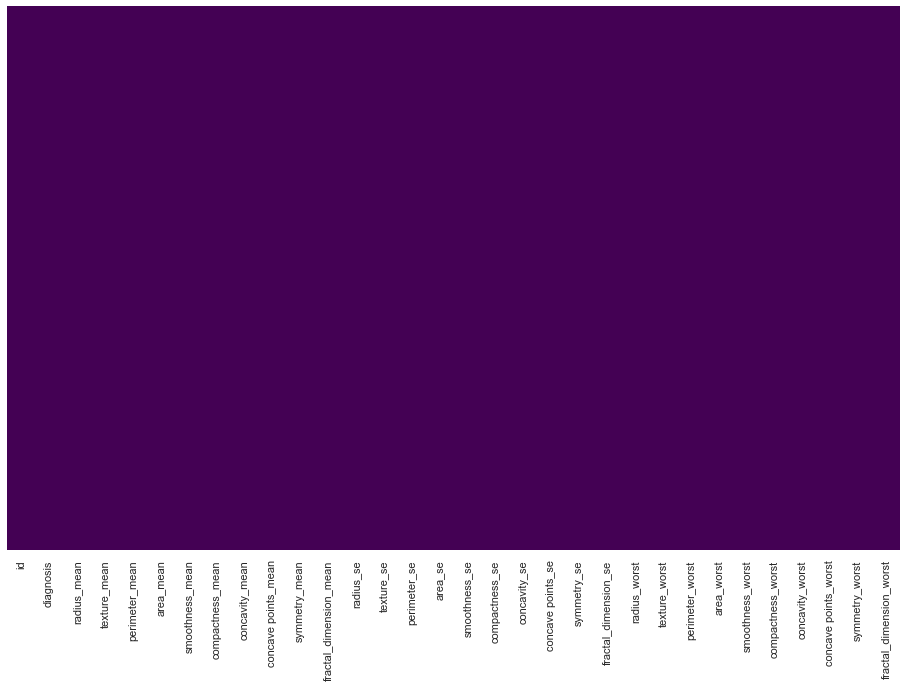

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Since there is no missing data, and the ID column doesn't really matter for the exploratory analysis and the future Machine Learning algorithm, I will remove it now.
Since there is no missing data, and the ID column doesn't really matter for the exploratory analysis and the future Machine Learning algorithm, I will remove it now.

In [21]:
df.drop('id', axis=1, inplace=True)

In [22]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Outliers Study

Although the dataset does not have missing data, it is necessary to study them, mainly due to the presence of outliers.

The following lines of code use Seaborn and Matplotlib to package boxplots and visually study outliers.

Text(0.5, 1.0, 'Area Mean')

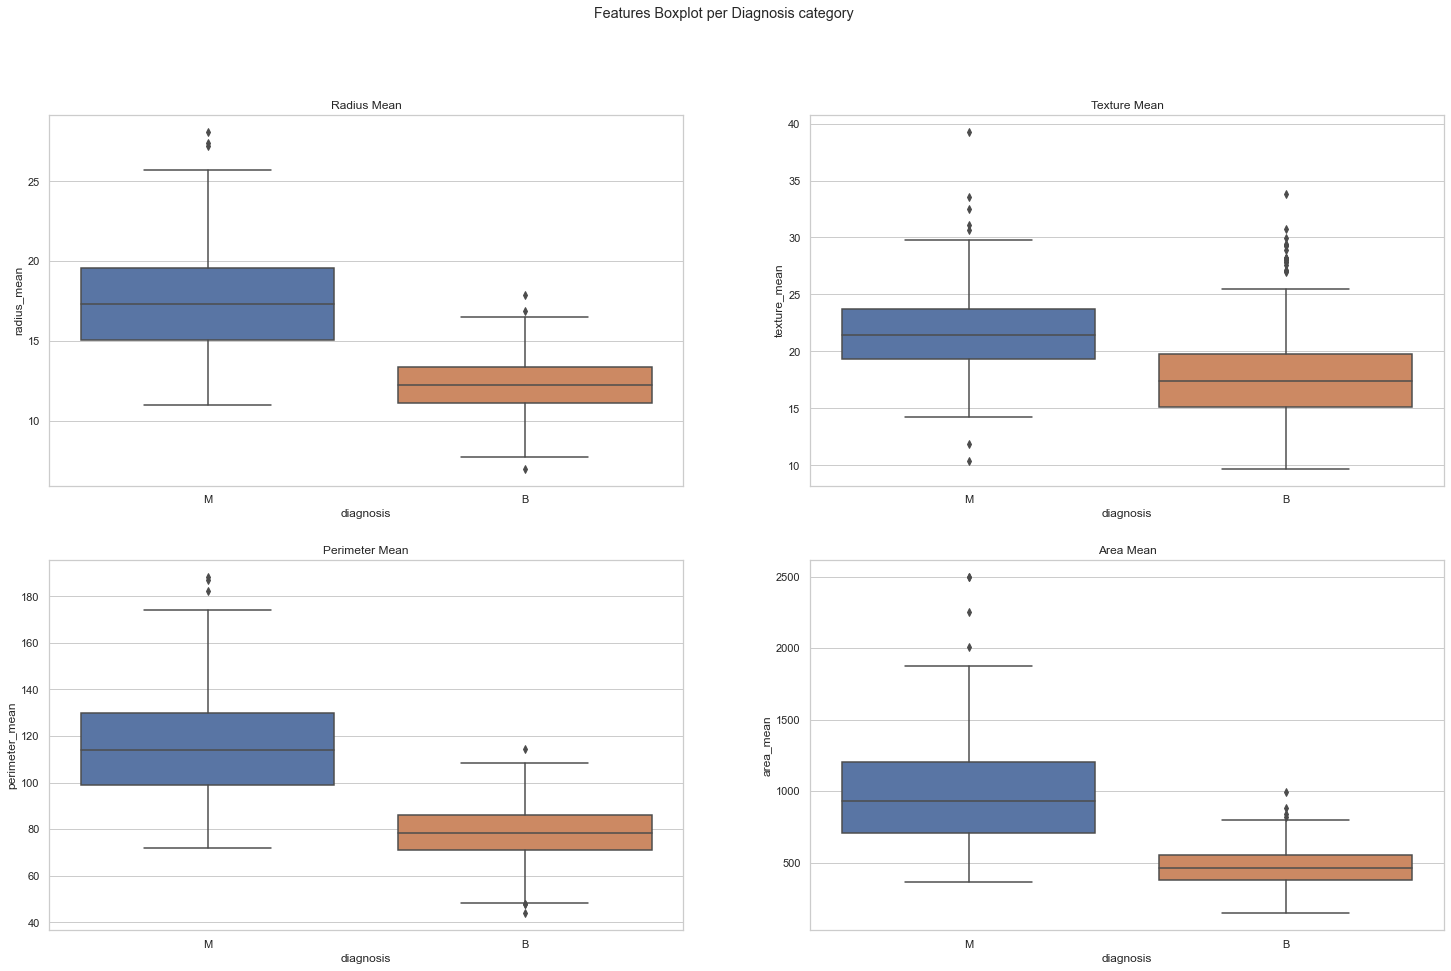

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('Features Boxplot per Diagnosis category')

# Radius Mean
sns.boxplot(ax=axes[0,0], x='diagnosis', y='radius_mean', data=df, orient='v')
axes[0,0].set_title('Radius Mean')

# Texture Mean
sns.boxplot(ax=axes[0,1], x='diagnosis', y='texture_mean', data=df, orient='v')
axes[0,1].set_title('Texture Mean')

# Perimeter Mean
sns.boxplot(ax=axes[1,0], x='diagnosis', y='perimeter_mean', data=df, orient='v')
axes[1,0].set_title('Perimeter Mean')

# Area Mean
sns.boxplot(ax=axes[1,1], x='diagnosis', y='area_mean', data=df, orient='v')
axes[1,1].set_title('Area Mean')

Text(0.5, 1.0, 'Symmetry Mean')

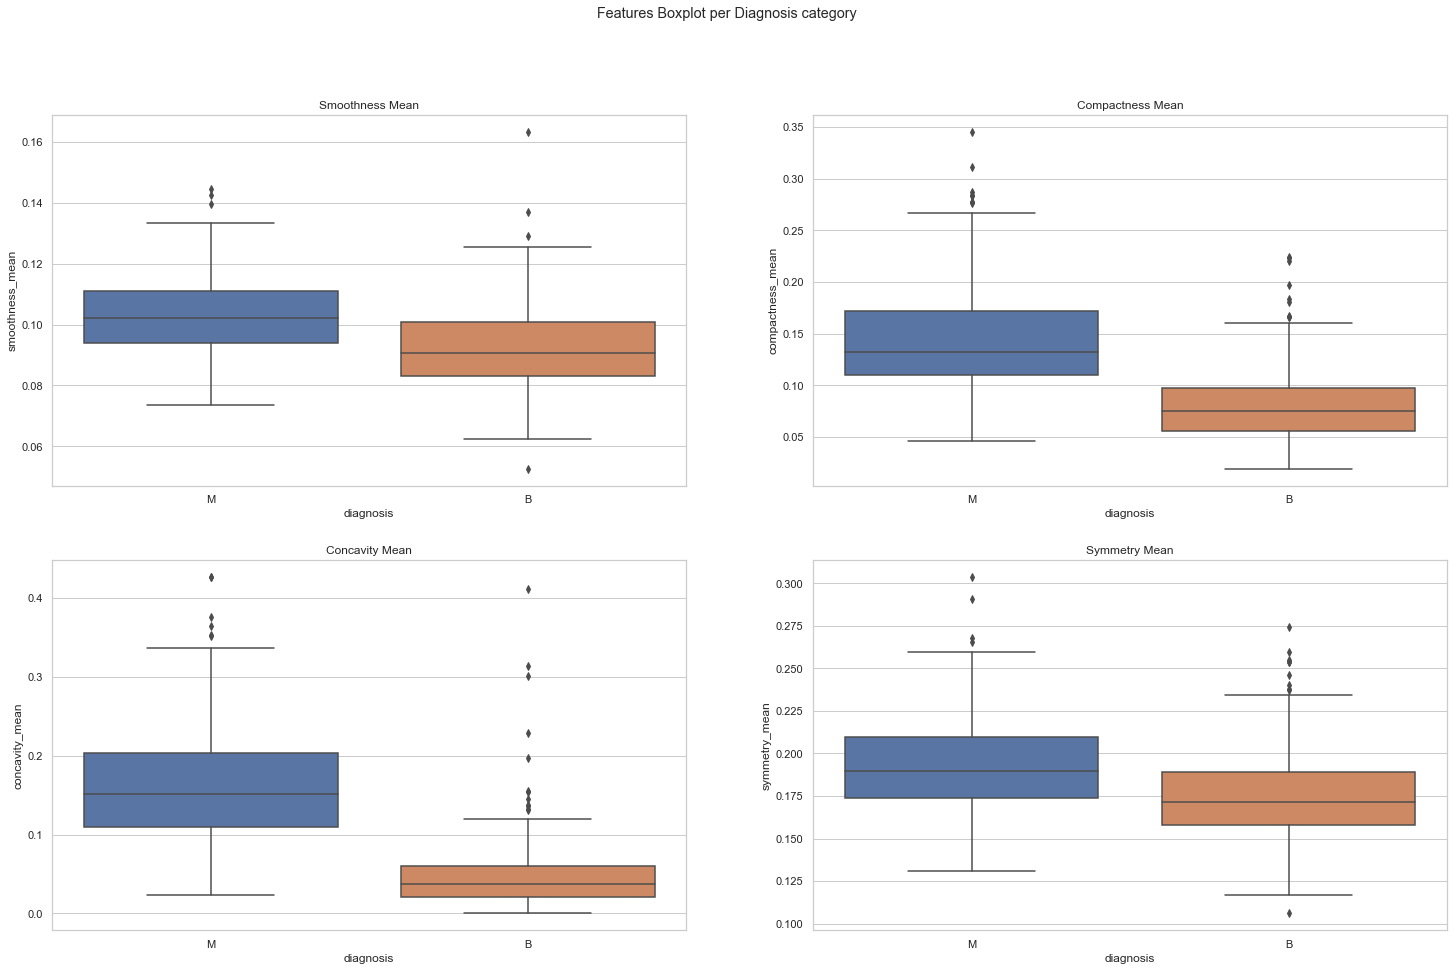

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('Features Boxplot per Diagnosis category')

# Smoothness Mean
sns.boxplot(ax=axes[0,0], x='diagnosis', y='smoothness_mean', data=df, orient='v')
axes[0,0].set_title('Smoothness Mean')

# Compactness Mean
sns.boxplot(ax=axes[0,1], x='diagnosis', y='compactness_mean', data=df, orient='v')
axes[0,1].set_title('Compactness Mean')

# Concavity Mean
sns.boxplot(ax=axes[1,0], x='diagnosis', y='concavity_mean', data=df, orient='v')
axes[1,0].set_title('Concavity Mean')

# Symmetry Mean
sns.boxplot(ax=axes[1,1], x='diagnosis', y='symmetry_mean', data=df, orient='v')
axes[1,1].set_title('Symmetry Mean')

From the above boxplots it can be seen that all 'mean' type features have outliers.

Now it is necessary to determine one of three paths to take to deal with these outliers:
1) Delete this data, depending on the amount.

2) Replace them, depending on the relationship that the feature has with other features

3) Leave them, as one more measurement. This is subject to knowledge in the scientific area of this dataset, mainly to verify that the data is physiologically possible, and to ensure that the outlier dataset will not generate a poor or biased machine learning algorithm.

The approach I am going to take is to determine:
- Percentage of number of outliers per plotted feature
- Determine if the number of outliers is the same for all plotted features
- Define if the index positions are equal in the outliers of each plotted feature

This will help make a decision regarding the treatment of this data.

In [57]:
outliers_radius_mean = df['radius_mean'][(df['radius_mean']>df['radius_mean'].quantile(q=0.75))].count()
outliers_texture_mean = df['texture_mean'][(df['texture_mean']>df['texture_mean'].quantile(q=0.75))].count()
outliers_perimeter_mean = df['perimeter_mean'][(df['perimeter_mean']>df['perimeter_mean'].quantile(q=0.75))].count()
outliers_area_mean = df['area_mean'][(df['area_mean']>df['area_mean'].quantile(q=0.75))].count()
outliers_smoothness_mean = df['smoothness_mean'][(df['smoothness_mean']>df['smoothness_mean'].quantile(q=0.75))].count()
outliers_compactness_mean = df['compactness_mean'][(df['compactness_mean']>df['compactness_mean'].quantile(q=0.75))].count()
outliers_concavity_mean = df['concavity_mean'][(df['concavity_mean']>df['concavity_mean'].quantile(q=0.75))].count()
outliers_concave_points_mean = df['concave points_mean'][(df['concave points_mean']>df['concave points_mean'].quantile(q=0.75))].count()

if outliers_area_mean == outliers_texture_mean == outliers_perimeter_mean == outliers_area_mean == outliers_smoothness_mean == outliers_compactness_mean == outliers_concavity_mean == outliers_concave_points_mean:
    print('From the plotted features, all of them have the same amount of outliers.')
    
    # Since the amount of outliers is the same for all features, I can use any for the percentage
    percentage_outliers = (df['concavity_mean'][(df['concavity_mean']>df['concavity_mean'].quantile(q=0.75))].count()*100)/len(df)
    
    print('The percentage of outliers is {:.3f}%'.format(percentage_outliers))
else:
    print('The amount of outliers is not the same for all features')

From the plotted features, all of them have the same amount of outliers.
The percentage of outliers is 24.956%


In [62]:
radius_mean_outliers_index = df[(df['radius_mean']>df['radius_mean'].quantile(q=0.75))].index
texture_mean_outliers_index = df[(df['texture_mean']>df['texture_mean'].quantile(q=0.75))].index
perimeter_mean_outliers_index = df[(df['perimeter_mean']>df['perimeter_mean'].quantile(q=0.75))].index
area_mean_outliers_index = df[(df['area_mean']>df['area_mean'].quantile(q=0.75))].index
smoothness_mean_outliers_index = df[(df['smoothness_mean']>df['smoothness_mean'].quantile(q=0.75))].index
compactness_mean_outliers_index = df[(df['compactness_mean']>df['compactness_mean'].quantile(q=0.75))].index
concavity_mean_outliers_index = df[(df['concavity_mean']>df['concavity_mean'].quantile(q=0.75))].index
concave_points_mean_outliers_index = df[(df['concave points_mean']>df['concave points_mean'].quantile(q=0.75))].index

outliers_position_count = 0

for i in range(0,len(radius_mean_outliers_index)):
    if radius_mean_outliers_index[i] == texture_mean_outliers_index[i] == perimeter_mean_outliers_index[i] == area_mean_outliers_index[i] == smoothness_mean_outliers_index[i] == compactness_mean_outliers_index[i] == concavity_mean_outliers_index[i] == concave_points_mean_outliers_index[i]:
        outliers_position_count += 1
if outliers_position_count == outliers_radius_mean:
    print('All the outliers in all the features share the same index position.')
else:
    print('All the outliers in all the features do not share the same index position.')

All the outliers in all the features do not share the same index position.


Due to the fact that the outliers of the features named '_mean' all share the same amount and represent 24.956% of the total data, they do not all share the same index positions and given the fact that I do not know if these data are physiologically possible and I do not have the possibility of verifying these data with a health professional specialized in the field of cancer, the decision was made to leave these data as they are.

## Exploratoy analysis

Questions:
- Balance of diagnostic categories ?
- Which is the correlation between features (mean, se, worst) ?
- What are the strongest features to predict whether a tumor is malignant or benign ?

### Balance between diagnosis classes

In [32]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

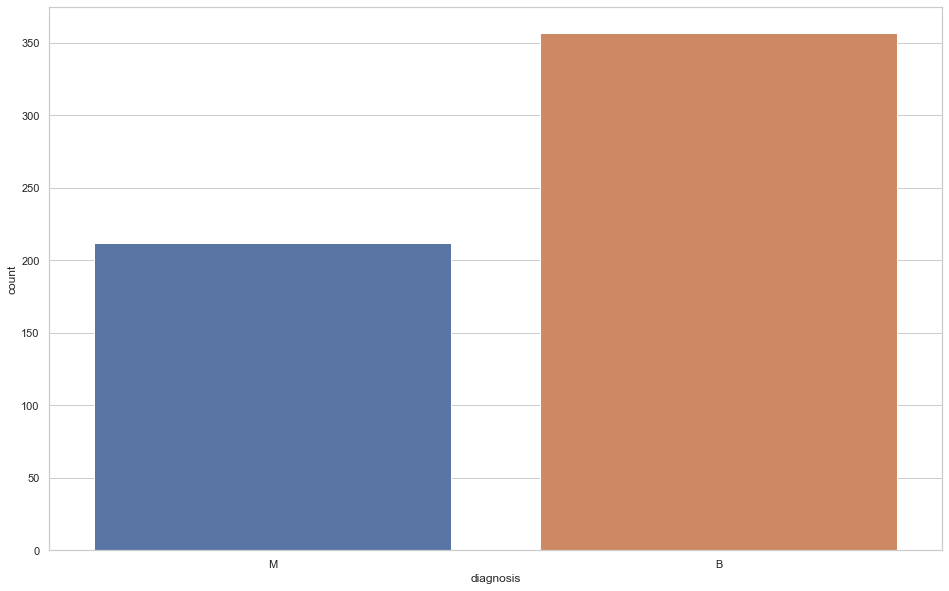

In [33]:
sns.countplot(x='diagnosis', data=df)

From a visual analysis it can be seen that class 'B' (Benign) has a greater number of cases (it has 145 more cases). However, the imbalance is not considerably large.

### Correlation between the 3 types of parameters (mean, se, worst)

Heatmap of correlation of the entire dataset to study the relationship between all the features. This is mainly due to the fact that there are 3 types of data (mean, se, worst) and features that are mathematically correlated as area, perimeter and radius.

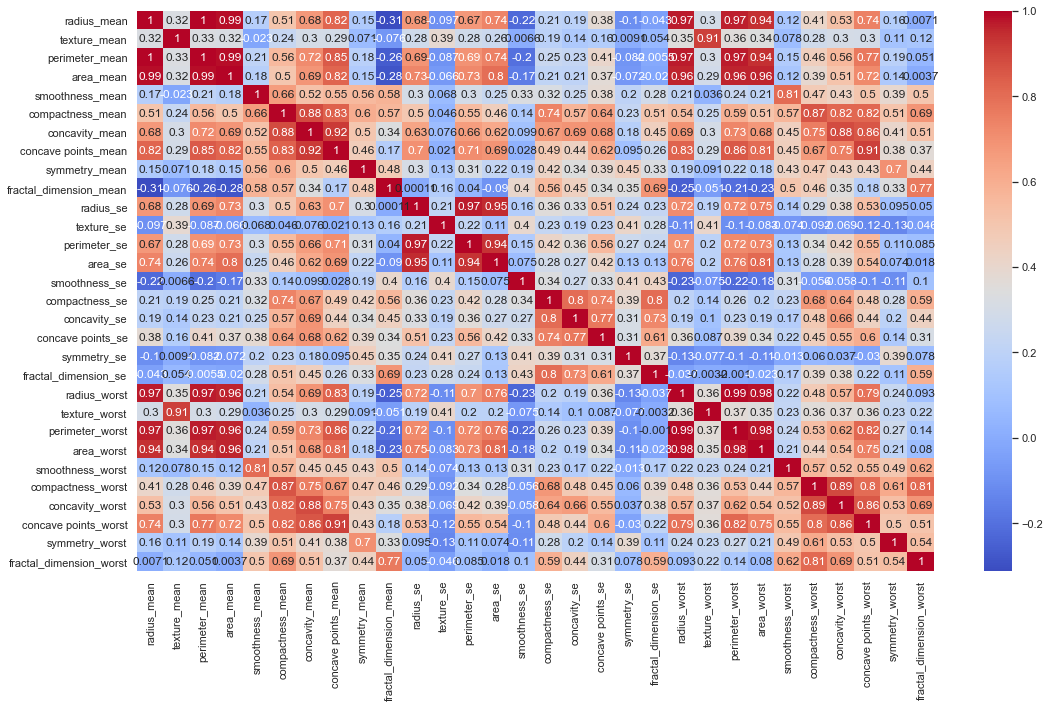

In [34]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.tight_layout()
plt.show()

Studying the graph above it is evident that there are many parameters that have a fairly high correlation, mainly between the 3 types of features (mean, se and worst).

### Analyzing the strongest features

Partition of the original dataset into features with similar characteristics (mean, se, worst) to be able to study them individually with later pairplots and to be able to establish their weight in future predictions.

In [35]:
diagnos = df.loc[:, 'diagnosis']

r_mean = df.loc[:,'radius_mean']
r_se = df.loc[:,'radius_se']
r_worst = df.loc[:,'radius_worst']

texture_mean = df.loc[:,'texture_mean']
texture_se = df.loc[:,'texture_se']
texture_worst = df.loc[:,'texture_worst']

per_mean = df.loc[:,'perimeter_mean']
per_se = df.loc[:,'perimeter_se']
per_worst = df.loc[:,'perimeter_worst']

area_mean = df.loc[:,'area_mean']
area_se = df.loc[:,'area_se']
area_worst = df.loc[:,'area_worst']

smoothness_mean = df.loc[:,'smoothness_mean']
smoothness_se = df.loc[:,'smoothness_se']
smoothness_worst = df.loc[:,'smoothness_worst']

compactness_mean = df.loc[:,'compactness_mean']
compactness_se = df.loc[:,'compactness_se']
compactness_worst = df.loc[:,'compactness_worst']

concavity_mean = df.loc[:,'concavity_mean']
concavity_se = df.loc[:,'concavity_se']
concavity_worst = df.loc[:,'concavity_worst']

concave_points_mean = df.loc[:,'concave points_mean']
concave_points_se = df.loc[:,'concave points_se']
concave_points_worst = df.loc[:,'concave points_worst']

symmetry_mean = df.loc[:,'symmetry_mean']
symmetry_se = df.loc[:,'symmetry_se']
symmetry_worst = df.loc[:,'symmetry_worst']

fractal_dimension_mean = df.loc[:,'fractal_dimension_mean']
fractal_dimension_se = df.loc[:,'fractal_dimension_se']
fractal_dimension_worst = df.loc[:,'fractal_dimension_worst']

#### Radius

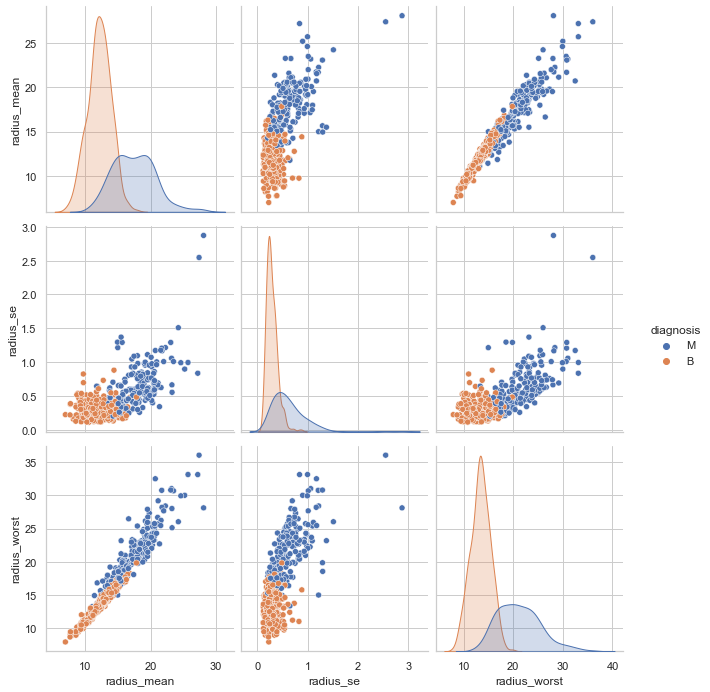

In [36]:
d_radius = [r_mean, r_se, r_worst]
radius_all = pd.DataFrame(data=d_radius)

radius_all = radius_all.transpose()

radius_all = pd.concat([radius_all, diagnos], axis=1)

radius_plot = sns.pairplot(data=radius_all, hue='diagnosis')
radius_plot.fig.set_size_inches(10,10)

In the diagonal plots we can see how unbalanced is the data. However it's obvious that the bigger the radius it's more likely to have a malignant output. The features that ams check this are radius_mean and radius_se

#### Texture

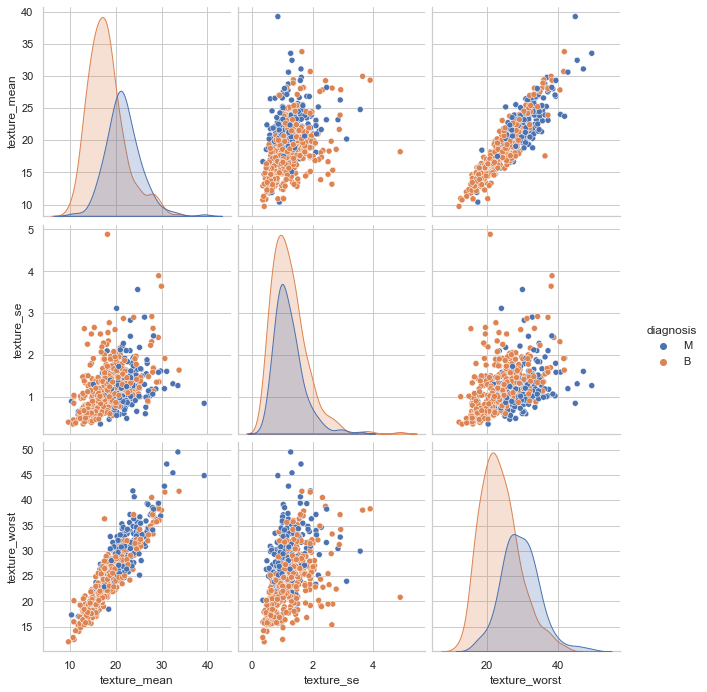

In [37]:
d_texture = [texture_mean, texture_se, texture_worst]
texture_all = pd.DataFrame(data=d_texture)

texture_all = texture_all.transpose()

texture_all = pd.concat([texture_all, diagnos], axis=1)

texture_plot = sns.pairplot(data=texture_all, hue='diagnosis')
texture_plot.fig.set_size_inches(10,10)

These plots are such good predictors for differentiating between benign and malignant output, because they overlap too much.
This is more marked in texture_se

#### Perimeter

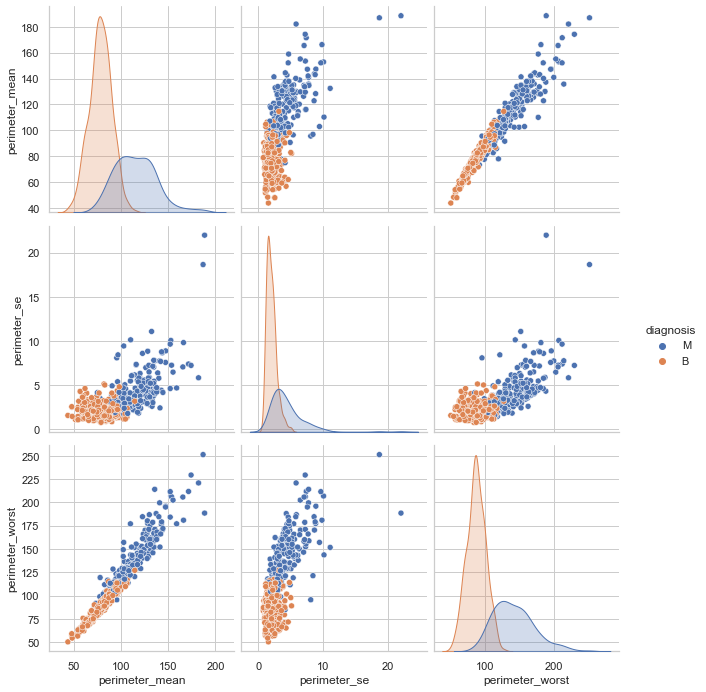

In [38]:
d_per = [per_mean, per_se, per_worst]
per_all = pd.DataFrame(data=d_per)

per_all = per_all.transpose()

per_all = pd.concat([per_all, diagnos], axis=1)

permtr_plot = sns.pairplot(data=per_all, hue='diagnosis')
permtr_plot.fig.set_size_inches(10,10)

Perimeter is almost a perfect predictor of radius, since this is a factor of the other.

#### Area

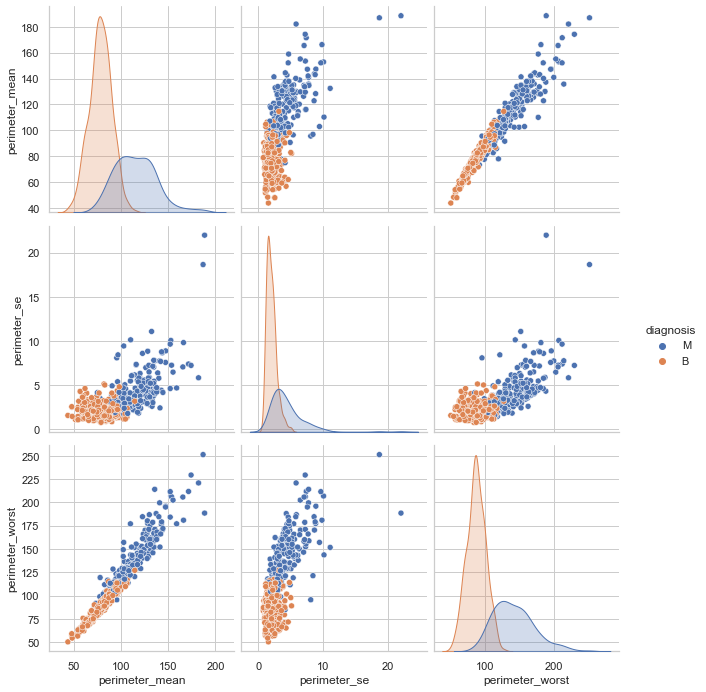

In [39]:
d_area = [area_mean, area_se, area_worst]
area_all = pd.DataFrame(data=d_area)

area_all = area_all.transpose()

area_all = pd.concat([area_all, diagnos], axis=1)

area_plot = sns.pairplot(data=per_all, hue='diagnosis')
area_plot.fig.set_size_inches(10,10)

Very similar results to those obtained in the radius and perimeter plots.

#### Smoothness

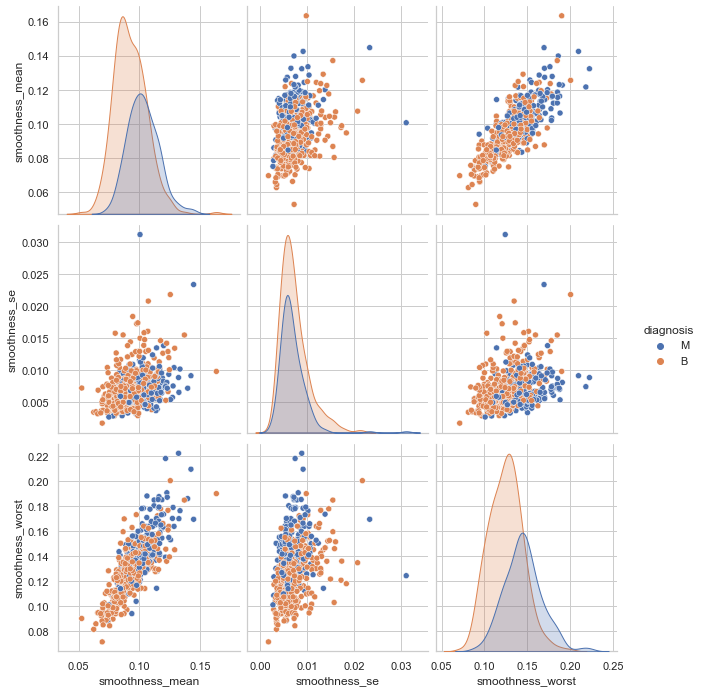

In [40]:
d_smoothness = [smoothness_mean, smoothness_se, smoothness_worst]
smoothness_all = pd.DataFrame(data=d_smoothness)

smoothness_all = smoothness_all.transpose()

smoothness_all = pd.concat([smoothness_all, diagnos], axis=1)

smoothness_plot = sns.pairplot(data=smoothness_all, hue='diagnosis')
smoothness_plot.fig.set_size_inches(10,10)

As with the 'texture' feature, smoothness is not a strong predictor of output.

#### Compactness

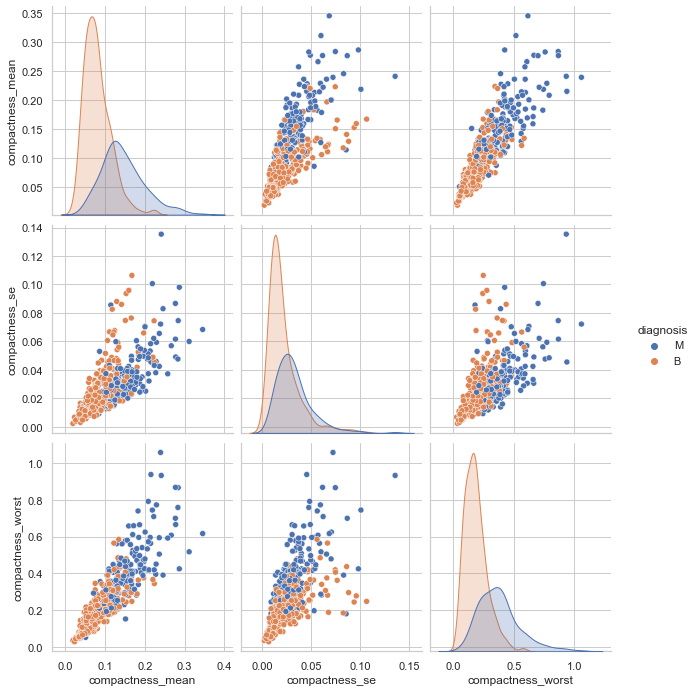

In [41]:
d_compactness = [compactness_mean, compactness_se, compactness_worst]
compactness_all = pd.DataFrame(data=d_compactness)

compactness_all = compactness_all.transpose()

compactness_all = pd.concat([compactness_all, diagnos], axis=1)

compactness_plot = sns.pairplot(data=compactness_all, hue='diagnosis')
compactness_plot.fig.set_size_inches(10,10)

#### Concativy

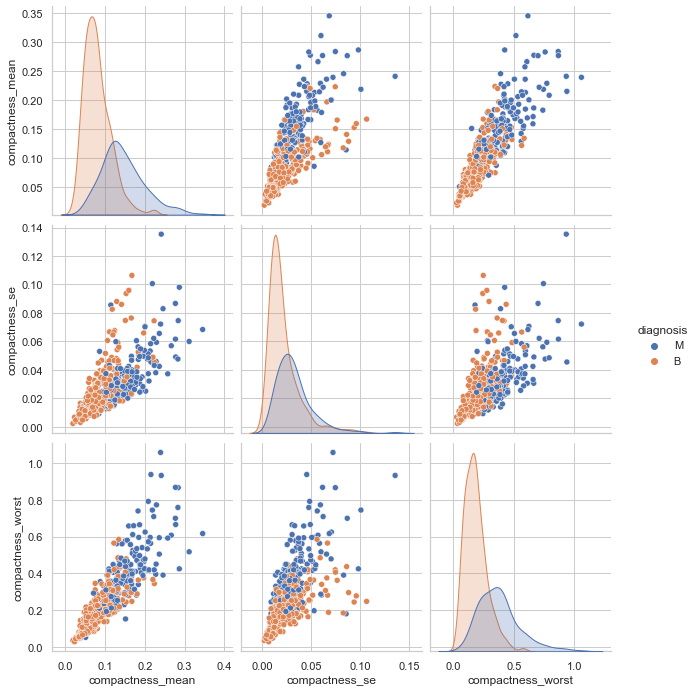

In [42]:
d_concavity = [concavity_mean, concavity_se, concavity_worst]
concavity_all = pd.DataFrame(data=d_concavity)

concavity_all = concavity_all.transpose()

concavity_all = pd.concat([concavity_all, diagnos], axis=1)

concavity_plot = sns.pairplot(data=compactness_all, hue='diagnosis')
concavity_plot.fig.set_size_inches(10,10)

In [43]:
result = concavity_mean - compactness_mean
result

0      0.02250
1      0.00826
2      0.03750
3     -0.04250
4      0.06520
        ...   
564    0.12800
565    0.04060
566   -0.00979
567    0.07440
568   -0.04362
Length: 569, dtype: float64

The difference between the concavity_all and compactness_all dataframes are minimal as can be seen both in the pairplot and in the subtraction performed in the cell above.

#### Concave points

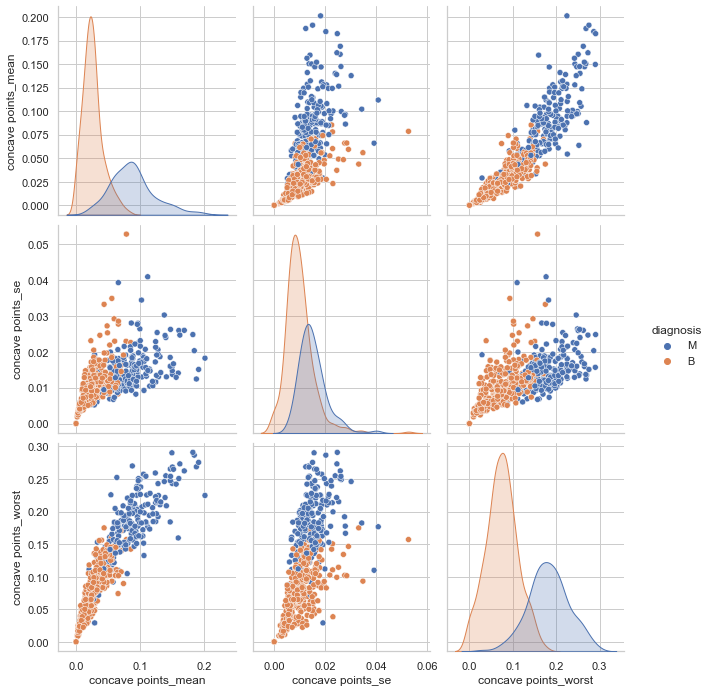

In [44]:
d_concave_points = [concave_points_mean, concave_points_se, concave_points_worst]
concave_points_all = pd.DataFrame(data=d_concave_points)

concave_points_all = concave_points_all.transpose()

concave_points_all = pd.concat([concave_points_all, diagnos], axis=1)

concave_points_plot = sns.pairplot(data=concave_points_all, hue='diagnosis')
concave_points_plot.fig.set_size_inches(10,10)

#### Symmetry

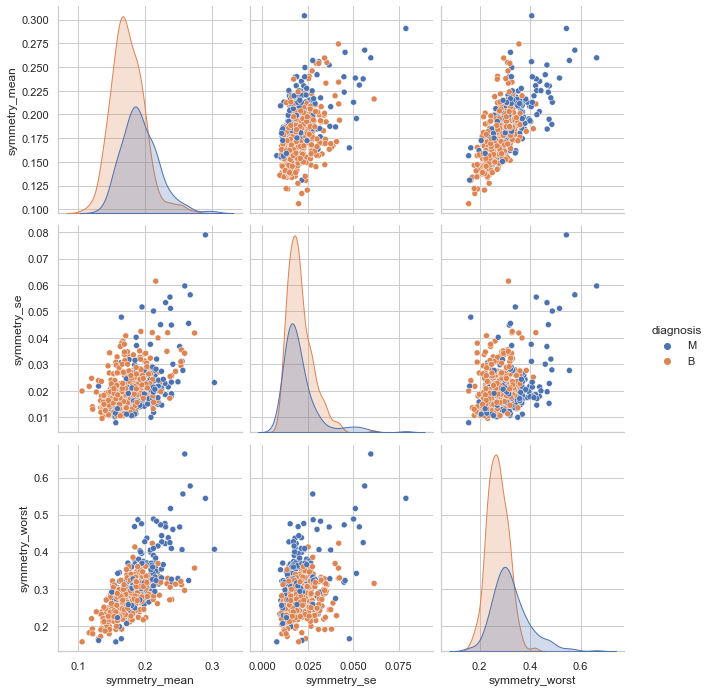

In [45]:
d_symmetry = [symmetry_mean, symmetry_se, symmetry_worst]
symmetry_all = pd.DataFrame(data=d_symmetry)

symmetry_all = symmetry_all.transpose()

symmetry_all = pd.concat([symmetry_all, diagnos], axis=1)

symmetry_plot = sns.pairplot(data=symmetry_all, hue='diagnosis')
symmetry_plot.fig.set_size_inches(10,10)

Symmetry is not a strong predictor, based on the plot above.

#### Fractal dimension

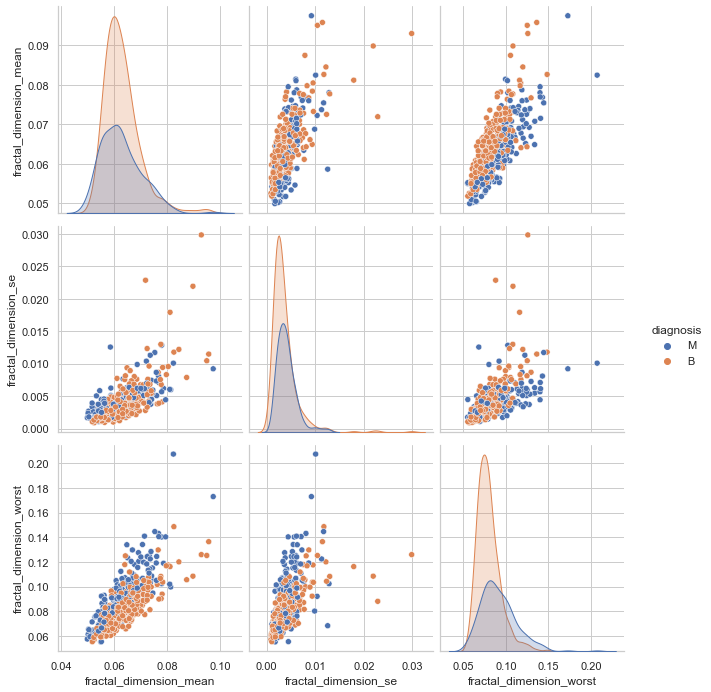

In [46]:
d_fractal_dimension = [fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst]
fractal_dimension_all = pd.DataFrame(data=d_fractal_dimension)

fractal_dimension_all = fractal_dimension_all.transpose()

fractal_dimension_all = pd.concat([fractal_dimension_all, diagnos], axis=1)

fractal_dimension_plot = sns.pairplot(data=fractal_dimension_all, hue='diagnosis')
fractal_dimension_plot.fig.set_size_inches(10,10)

Fractal dimension is not a strong predictor, based on the plot above.

### Conclusion

The strongest features to predict whether a tumor belongs to the 'malignant' or 'benign' category are the following:
- Radius
- Perimeter
- Area
- Compactness
- Concavity
- Concave points

Based on the graphs that can be seen in the cells above. This is also supported by the heatmap that was made at the beginning of the document, where it can be seen that the highest correlation between features is found between these features (mainly between the mean and worst groups).

However, because as explained above, radius, perimeter and area are practically the same, due to their mathematical relationship. The same happens between compactness, concavity and concave points, but not for a mathematical reason.

This leads us to wonder if it would be possible to develop a simpler prediction algorithm, by taking fewer features, and at the same time be equal to or more effective than one that takes the entire dataframe. This will be confirmed later when we get to this part of the code.